In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

#DATA

In [2]:
columns = ['Age', 'Year of Operation', 'Nodes', 'Class']
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/haberman.csv',names=columns)
df.head()

,Age,Year of Operation,Nodes,Class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                306 non-null    int64
 1   Year of Operation  306 non-null    int64
 2   Nodes              306 non-null    int64
 3   Class              306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
df.shape

(306, 4)

In [5]:
cn=0
for i in df.Class:
  if i==1: cn+=1

cm=0
for i in df.Class:
  if i==2: cm+=2

print("People who survived Breast Cancer Operation: ",cn,"---->",cn/306)
print("People who couldn't survive within 5 years of Breast Cancer Operation: ",cm,"---->",cm/306)

People who survived Breast Cancer Operation:  225 ----> 0.7352941176470589
People who couldn't survive within 5 years of Breast Cancer Operation:  162 ----> 0.5294117647058824


#EDA

###Bivariate Analysis

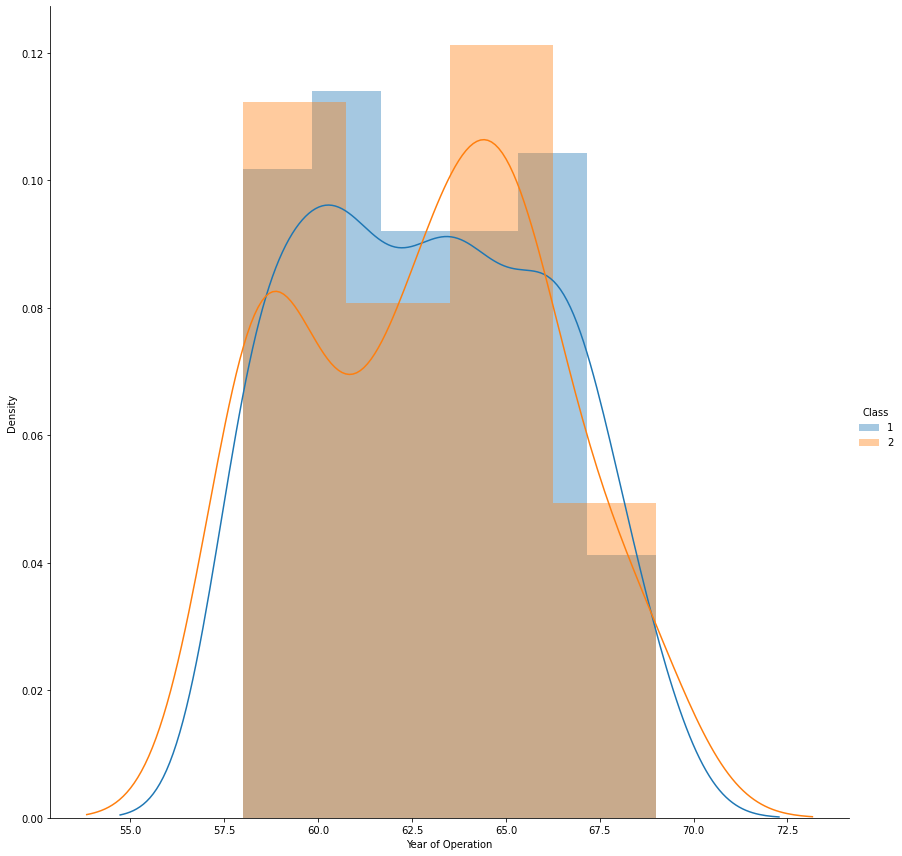

In [6]:
sns.FacetGrid(df,hue="Class",size=12).map(sns.distplot,"Year of Operation").add_legend()
plt.show()

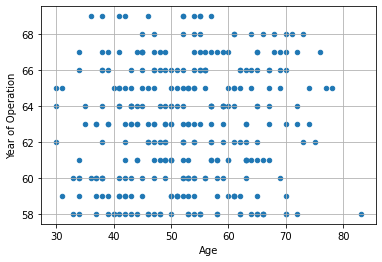

In [7]:
#plotting the dataset using seaborn
df.plot(kind="scatter",x="Age",y="Year of Operation");
#kind type scatter
plt.grid()
#plot.grid will show the grid
plt.show()
#show function will show the plot result

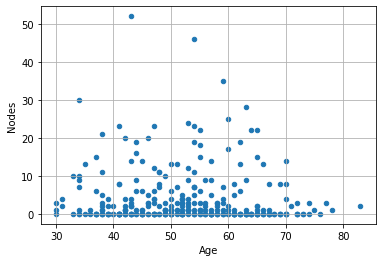

In [8]:
#plotting the dataset using seaborn
df.plot(kind="scatter",x="Age",y="Nodes");
#kind type scatter
plt.grid()
#plot.grid will show the grid
plt.show()
#show function will show the plot result

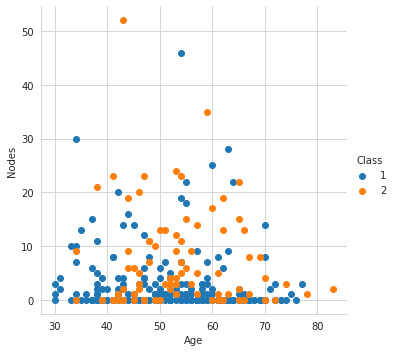

In [9]:
#adding the white grid style 
sns.set_style("whitegrid");
#adding datapoint colour and size
sns.FacetGrid(df, hue="Class",size=5)\
        .map(plt.scatter, "Age","Nodes")\
        .add_legend(); #legend fuction will describe class color
plt.show()

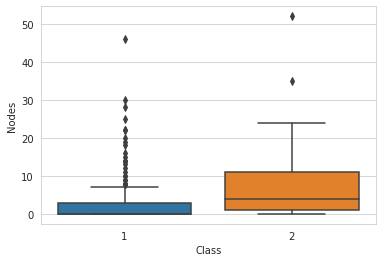

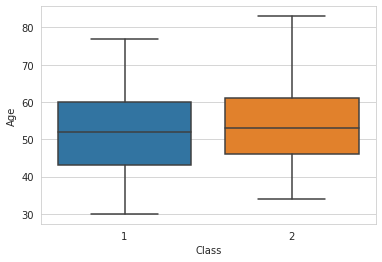

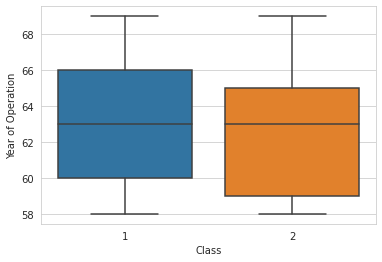

In [10]:
#Box Plot for the feature axillary nodes
sns.boxplot(x = 'Class', y ='Nodes', data = df)
plt.show()
#Box Plot for the feature Age
sns.boxplot(x = 'Class',y = 'Age', data = df)
plt.show()
#Box Plot for the feature Year of Operation
sns.boxplot(x = 'Class', y = 'Year of Operation', data = df)
plt.show()

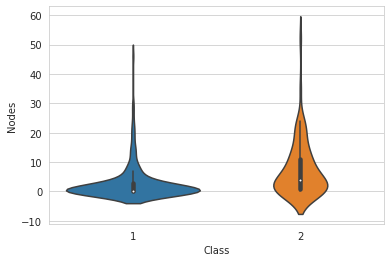

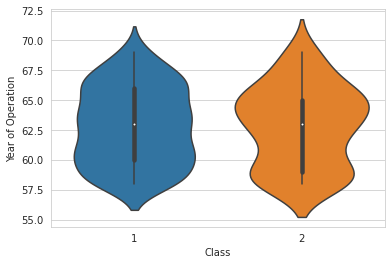

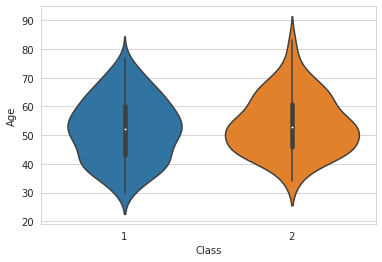

In [11]:
#Violin Plots for Axillary_Nodes
sns.violinplot(x = "Class", y = "Nodes", data = df, size = 8)
plt.show()

#Violin Plots for Operation_Year
sns.violinplot(x = "Class", y = "Year of Operation", data = df, size = 8)
plt.show()

#Violin Plots for Age
sns.violinplot(x = "Class", y = "Age", data = df, size = 8)
plt.show()

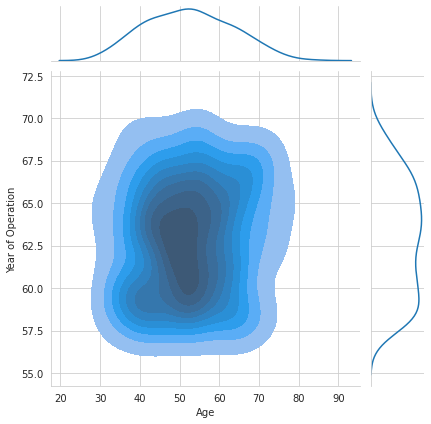

In [12]:
sns.jointplot(data=df, x="Age",y="Year of Operation", kind="kde",shade=True)
plt.ylabel("Cancer")
plt.show()

##Multivariate Analysis

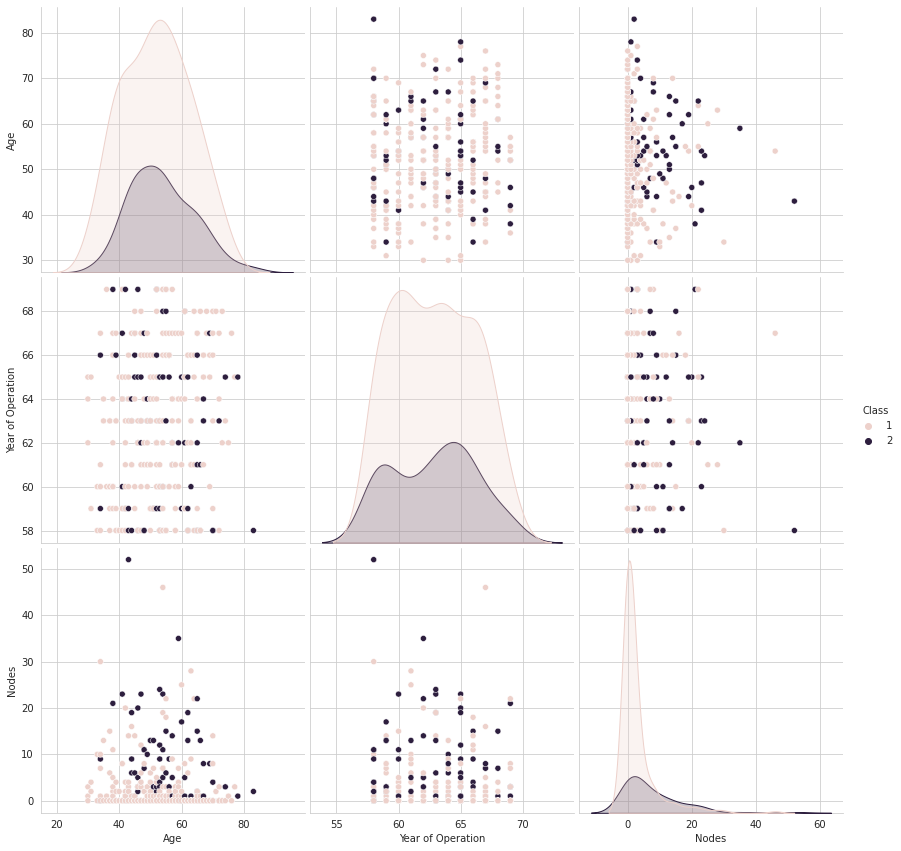

In [13]:
plt.close()
sns.pairplot(df,hue="Class",vars=['Age', 'Year of Operation', 'Nodes'],size=4)
plt.show()

In [14]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(df, x='Age', y='Year of Operation', z='Class',
              color='Year of Operation', size='Age', size_max=18,
              symbol='Class', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

#Generating Dummy Classifier

In [15]:
# baseline model and test harness for the haberman dataset

X = df[['Age', 'Year of Operation', 'Nodes']].values
y = df['Class'].values
y_true = LabelEncoder().fit_transform(y)


def brier_skill_score(y_true, y_prob):
	ref_probs = [0.26471 for _ in range(len(y_true))]
	bs_ref = brier_score_loss(y_true, ref_probs)
	bs_model = brier_score_loss(y_true, y_prob)
	return 1.0 - (bs_model / bs_ref)

def evaluate_model(X, y, model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	metric = make_scorer(brier_skill_score, needs_proba=True)
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores


# print(X.shape, y.shape, Counter(y))
model = DummyClassifier(strategy='prior')
scores = evaluate_model(X, y, model)
print('Mean BSS: %.3f (%.3f)' % (mean(scores), std(scores)))
print("Any model with accuracy more than our dummy model accuracy will have some skill as we choose dummy classifier as our baseline reference model for comparision.")

Mean BSS: -0.000 (0.000)
Any model with accuracy more than our dummy model accuracy will have some skill as we choose dummy classifier as our baseline reference model for comparision.


#Probabilistic Models

>Logisti 0.060 (0.143)
>LinearD 0.064 (0.154)
>Quadrat 0.027 (0.221)
>Gaussia 0.012 (0.212)
>Multino -0.211 (0.369)
>Gaussia -0.142 (0.041)


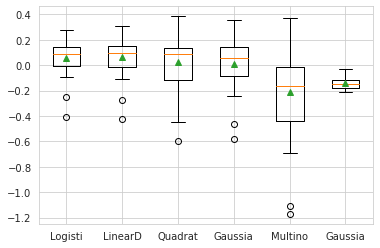

In [16]:
X = df[['Age', 'Year of Operation', 'Nodes']].values
y = df['Class'].values
y_true = LabelEncoder().fit_transform(y)


def brier_skill_score(y_true, y_prob):
	ref_probs = [0.26471 for _ in range(len(y_true))]
	bs_ref = brier_score_loss(y_true, ref_probs)
	bs_model = brier_score_loss(y_true, y_prob)
	return 1.0 - (bs_model / bs_ref)


def evaluate_model(X, y, model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	metric = make_scorer(brier_skill_score, needs_proba=True)
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores


models = [LogisticRegression(solver='lbfgs'), LinearDiscriminantAnalysis(),
	QuadraticDiscriminantAnalysis(), GaussianNB(), MultinomialNB(),
	GaussianProcessClassifier()]
names, values = list(), list()

for model in models:
	name = type(model).__name__[:7]
	scores = evaluate_model(X, y, model)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
	names.append(name)
	values.append(scores)
plt.boxplot(values, labels=names, showmeans=True)
plt.show()

#Model Evaluation With Scaled Inputs

>Logisti 0.062 (0.140)
>LinearD 0.064 (0.154)
>Quadrat 0.027 (0.221)
>Gaussia 0.012 (0.212)
>Gaussia 0.097 (0.133)


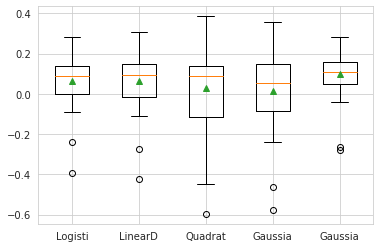

In [17]:
X = df[['Age', 'Year of Operation', 'Nodes']].values
y = df['Class'].values
y_true = LabelEncoder().fit_transform(y)


def brier_skill_score(y_true, y_prob):
	ref_probs = [0.26471 for _ in range(len(y_true))]
	bs_ref = brier_score_loss(y_true, ref_probs)
	bs_model = brier_score_loss(y_true, y_prob)
	return 1.0 - (bs_model / bs_ref)
 
def evaluate_model(X, y, model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	metric = make_scorer(brier_skill_score, needs_proba=True)
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores
 

models = [LogisticRegression(solver='lbfgs'), LinearDiscriminantAnalysis(),
	QuadraticDiscriminantAnalysis(), GaussianNB(), GaussianProcessClassifier()]
names, values = list(), list()

for model in models:
	name = type(model).__name__[:7]
	pip = Pipeline(steps=[('t', StandardScaler()),('m',model)])
	scores = evaluate_model(X, y, pip)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
	names.append(name)
	values.append(scores)

plt.boxplot(values, labels=names, showmeans=True)
plt.show()

#Model Evaluation With Power Transform


>Logisti 0.110 (0.142)
>LinearD 0.107 (0.164)
>Gaussia 0.100 (0.130)


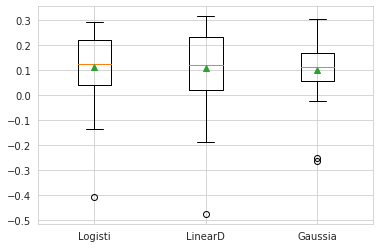

In [18]:
X = df[['Age', 'Year of Operation', 'Nodes']].values
y = df['Class'].values
y_true = LabelEncoder().fit_transform(y)


def brier_skill_score(y_true, y_prob):
	ref_probs = [0.26471 for _ in range(len(y_true))]
	bs_ref = brier_score_loss(y_true, ref_probs)
	bs_model = brier_score_loss(y_true, y_prob)
	return 1.0 - (bs_model / bs_ref)
 

def evaluate_model(X, y, model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	metric = make_scorer(brier_skill_score, needs_proba=True)
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores
 

models = [LogisticRegression(solver='lbfgs'), LinearDiscriminantAnalysis(), GaussianProcessClassifier()]
names, values = list(), list()
for model in models:
	name = type(model).__name__[:7]
	pip = Pipeline(steps=[('t1', MinMaxScaler()), ('t2', PowerTransformer()),('m',model)])
	scores = evaluate_model(X, y, pip)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
	names.append(name)
	values.append(scores)

plt.boxplot(values, labels=names, showmeans=True)
plt.show()

#Making Prediction on New Data

In [20]:
X = df[['Age', 'Year of Operation', 'Nodes']].values
y = df['Class'].values
y_true = LabelEncoder().fit_transform(y)

model = Pipeline(steps=[('t1', MinMaxScaler()), ('t2', PowerTransformer()),('m',LogisticRegression(solver='lbfgs'))])
model.fit(X, y)

print('Survival Cases:')
data = [[31,59,2], [31,65,4], [34,60,1]]

for row in data:
	yhat = model.predict_proba([row])
	p_survive = yhat[0, 0] * 100
	print('>data=%s, Survival=%.3f%%' % (row, p_survive))

print('Non-Survival Cases:')
data = [[44,64,6], [34,66,9], [38,69,21]]
for row in data:
	yhat = model.predict_proba([row])
	p_survive = yhat[0, 0] * 100
	print('>data=%s, Survival=%.3f%%' % (row, p_survive))

Survival Cases:
>data=[31, 59, 2], Survival=83.597%
>data=[31, 65, 4], Survival=77.264%
>data=[34, 60, 1], Survival=86.776%
Non-Survival Cases:
>data=[44, 64, 6], Survival=63.092%
>data=[34, 66, 9], Survival=63.452%
>data=[38, 69, 21], Survival=53.389%
